Dropout Using Tenserflow

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8593 - loss: 0.4862 - val_accuracy: 0.9588 - val_loss: 0.1396
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9536 - loss: 0.1546 - val_accuracy: 0.9688 - val_loss: 0.1015
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9653 - loss: 0.1113 - val_accuracy: 0.9736 - val_loss: 0.0909
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9729 - loss: 0.0866 - val_accuracy: 0.9766 - val_loss: 0.0779
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9770 - loss: 0.0755 - val_accuracy: 0.9773 - val_loss: 0.0758
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0898


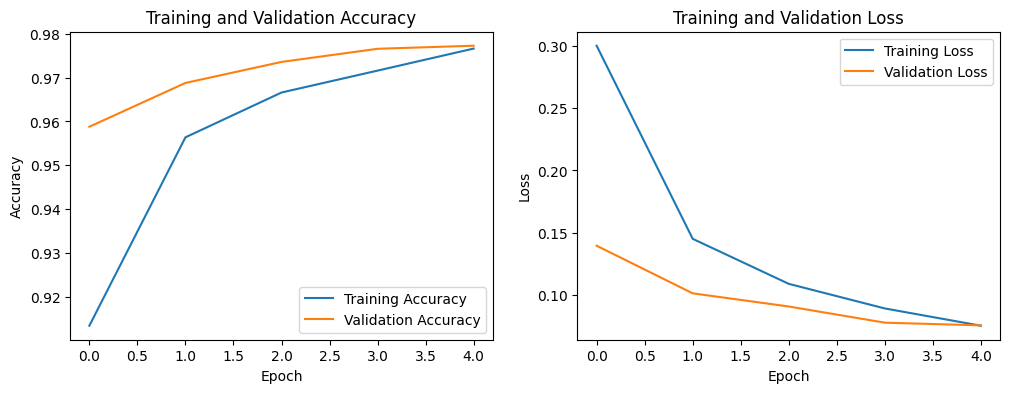

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

mist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))

model.evaluate(x_test, y_test)

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Batch Normalization in Pytorch

In [ ]:
import tensorflow as tf

mist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Add Flatten layer here
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32)

model.summary()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8621 - loss: 0.4887
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9511 - loss: 0.1676
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9651 - loss: 0.1183
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9693 - loss: 0.0981
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9747 - loss: 0.0851


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,184 (598.38 KB)

 Trainable params: 51,018 (199.29 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 102,038 (398.59 KB)

In [ ]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(784, 64)
    self.bn = nn.BatchNorm1d(64)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(64, 10)
    self.softmax = nn.Softmax(dim = 1)

  def forward(self, x):
    x = x.view(x.size(0), -1) # Flatten the input tensor
    x = self.fc1(x)
    x = self.bn(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

model = Model()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

for epoch in range(5):
  for inputs, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 1.559636116027832
Epoch 2, Loss: 1.5050615072250366
Epoch 3, Loss: 1.5176360607147217
Epoch 4, Loss: 1.5039469003677368
Epoch 5, Loss: 1.5208853483200073
